In [3]:
# 导入模块
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import pandas as pd
from keras.models import Sequential, load_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [80]:
# 读取数据
dataframe = pd.read_csv('./datalab/62612/中国疫情.csv')
dataframe = dataframe.drop(columns=['Date'])

dataframe = dataframe.drop(columns=['New'])
# 查看前10条数据
#dataframe[10:30]

<function matplotlib.pyplot.show(*args, **kw)>

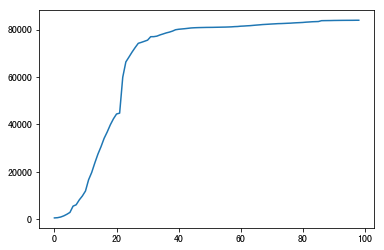

In [81]:
dataset = dataframe.values
plt.plot(dataset)
plt.show

In [82]:
dataset = dataset.astype('float32')
#归一化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [83]:
#分割训练集与测试集
train_size = int(len(dataset)*0.80)
test_size = len(dataset)-train_size

#print(test_size)

train,test = dataset[0:train_size,:],dataset[train_size:,:]


In [84]:
#时间滑窗

def create_dataset(dataset,look_back):
    dataX,dataY = [],[]
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i+look_back,0])
    return np.array(dataX),np.array(dataY)



def create_predict(dataset,look_back):
    dataX = []
    for i in range(len(dataset)-look_back):
        a = dataset[i+1:,0]
        dataX.append(a)
    return np.array(dataX)
look_back = 1

trainX,trainY = create_dataset(dataset,look_back)
testX,testY = create_dataset(test,look_back)


In [85]:
#需要转换数据，因为keras需要特征的数据格式
trainX = np.reshape(trainX,(trainX.shape[0],1,trainX.shape[1]))

testX = np.reshape(testX,(testX.shape[0],1,testX.shape[1]))


In [76]:
#trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=8, verbose=False)
#model.save("LSTM.h5")

In [86]:
#预测
trainPredict = model.predict(trainX)
testPredict  = model.predict(testX)


#预测结果转换为原有的格式
trainPredict = scaler.inverse_transform(trainPredict)
testPredict  = scaler.inverse_transform(testPredict)

#print(trainPredict)
#testY = scaler.inverse_transform([testY]) 

#trainPredict = model.predict(trainX)
#print(trainX)

#反归一化
#trainPredict = scaler.inverse_transform(trainPredict)
#print(trainPredict)
#trainY = scaler.inverse_transform([trainY])
predict_series = []
for i in range(30):
    p = dataset[-(look_back + 1):]
    p1 = create_predict(p, look_back)
    p2 = np.reshape(p1, (p1.shape[0], 1, p1.shape[1]))
    predict = model.predict(p2)
    dataset = np.vstack((dataset,predict))
    predict = scaler.inverse_transform(predict)
    predict=predict.flatten()
    predict = predict.tolist()   
    predict_series.append(predict)
    
    #print(predict_series)
print(predict_series)
    


[[90663.0078125], [98617.8046875], [107989.0703125], [118922.84375], [131482.71875], [144479.96875], [156343.75], [166640.203125], [175132.609375], [181264.6875], [185551.703125], [188482.734375], [190456.734375], [191699.65625], [192323.421875], [192634.4375], [192788.96875], [192865.671875], [192903.671875], [192922.5], [192931.84375], [192936.484375], [192938.765625], [192939.90625], [192940.484375], [192940.75], [192940.890625], [192940.953125], [192941.0], [192941.0]]


In [87]:
dataframe = pd.read_csv('./datalab/62612/中国疫情.csv')
future=np.arange(dataframe['Date'].shape[0]+1,dataframe['Date'].shape[0]+31,1)

<function matplotlib.pyplot.show(*args, **kw)>

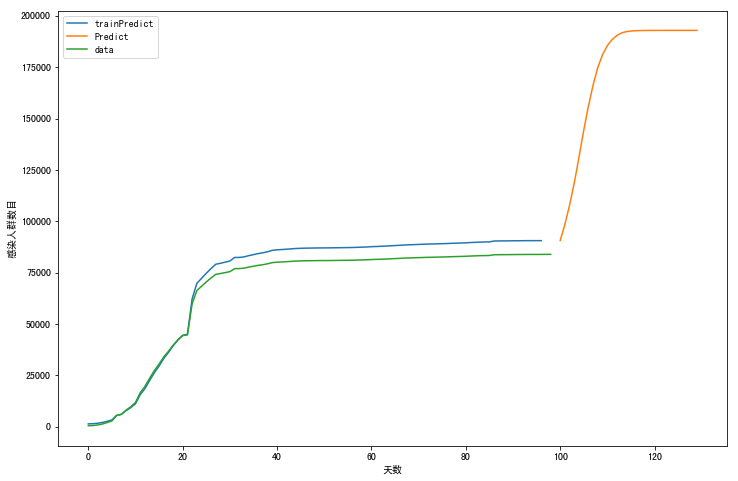

In [88]:
plt.figure(figsize=(12, 8))
#plt.plot(predict_series)
#plt.plot(trainPredict)
plt.plot(trainPredict)
plt.plot(future,predict_series)
#plt.title('训练集上的结果')
plt.xlabel('天数')
plt.ylabel('感染人群数目')
dataframe = pd.read_csv('./datalab/62612/中国疫情.csv')
dataframe = dataframe.drop(columns=['Date'])
dataframe = dataframe.drop(columns=['New'])
dataset = dataframe.values
plt.plot(dataset)

plt.legend(['trainPredict','Predict','data'], loc='best')
plt.show
#plt.plot(dataset)
#plt.show


In [215]:
# 读取新型冠状病毒数据进行测试
dataframe = pd.read_csv('./datalab/62626/美国疫情.csv')
dataframe = dataframe.drop(columns=['Date'])
dataframe = dataframe.drop(columns=['New'])
dataset = dataframe.values
dataset = dataset.astype('float32')
#归一化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
testdata,TEXTY  = create_dataset(dataset,3)


In [216]:

testdata = np.reshape(testdata,(testdata.shape[0],1,testdata.shape[1]))


In [ ]:
# 画图
plt.figure(figsize=(10, 8))
plt.plot(trainY[1:])
plt.plot(trainPredict)
plt.xlabel('天数')
plt.ylabel('感染人群数目')
plt.title('分析疫情的结果')
plt.legend(['train', 'trainPredict'], loc='best')
plt.show()
print(trainY[1:].size)
print(trainPredict.size)

In [233]:
# make one forecast with an LSTM,
def forecast_lstm(model, X, n_batch):
	# reshape input pattern to [samples, timesteps, features]
	X = X.reshape(1, 1, len(X))
	# make forecast
	forecast = model.predict(X, batch_size=n_batch)
	# convert to array
	return [x for x in forecast[0, :]]

In [234]:
# evaluate the persistence model
def make_forecasts(model, n_batch, train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = forecast_lstm(model, X, n_batch)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

In [235]:
# make forecasts
forecasts = make_forecasts(model, 1, dataset, test, 10, 10)
forecasts = scaler.inverse_transform(forecasts)
print(forecasts)
#print(trainPredict)
print(testPredict)

[[ 32285.62203255]
 [ 30990.06159615]
 [ 28674.41941124]
 [ 26177.14853907]
 [ 27106.88972651]
 [ 28528.75303655]]
[[ 32285.62109375]
 [ 30990.0625    ]
 [ 28674.41992188]
 [ 26177.1484375 ]]


<function matplotlib.pyplot.show(*args, **kw)>

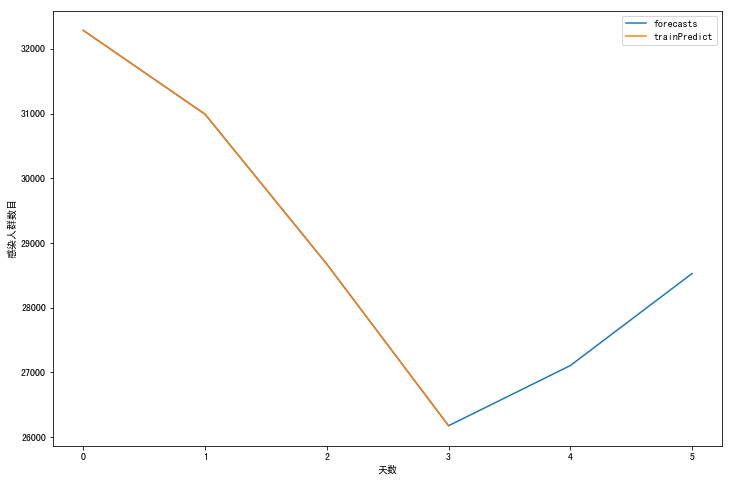

In [236]:
plt.figure(figsize=(12, 8))
#plt.plot(dataset)
plt.plot(forecasts)
#plt.plot(trainPredict)
plt.plot(testPredict)
#plt.title('训练集上的结果')
plt.xlabel('天数')
plt.ylabel('感染人群数目')
dataframe = pd.read_csv('./datalab/62626/美国test.csv')
dataframe = dataframe.drop(columns=['Date'])
dataframe = dataframe.drop(columns=['Confirmed'])
dataset = dataframe.values
#plt.plot(dataset)

plt.legend(['forecasts','trainPredict','testPredict','data'], loc='best')
plt.show
#plt.plot(dataset)
#plt.show


ValueError: x and y must have same first dimension, but have shapes (2,) and (1, 1)

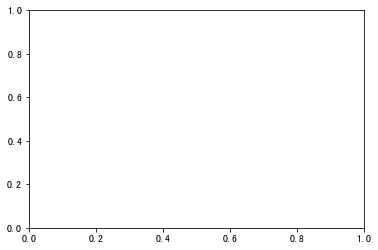

In [214]:
for i in range(len(forecasts)):
	off_s = len(dataset) - 10 + i - 1
	off_e = off_s + len(forecasts[i]) + 1
	xaxis = [x for x in range(off_s, off_e)]
	yaxis = [dataset[off_s]] + forecasts[i]
	plt.plot(xaxis, yaxis, color='red')

In [ ]:
# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	plt.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i - 1
		off_e = off_s + len(forecasts[i]) + 1
		xaxis = [x for x in range(off_s, off_e)]
		yaxis = [series.values[off_s]] + forecasts[i]
		pyplot.plot(xaxis, yaxis, color='red')
	# show the plot
	plt.show()

In [ ]:
plot_forecasts(dataset, forecasts, 12)